# Data Exploration Analysis of Crime Victim Data
## A. C. Coffin 
### 11/10/2023
### Northwestern Missouri State University
### MS Data Analytics Capstone
---
Data Exploration is critical to this project as victim data is often incomplete. In total there are 8 data sets that are utilized in this project, each of these have been loaded into an SQL database. Through the use of an SQL database it is possible to pull information from multiple sets when referencing data pulled from the National Crime Victim Survey (N-Dash). In order to pull the information from the N-Dash multiple quiries were made from the source and compiled into four data sets. All quieries were exported from the SQL server as CSV files. Complete list of sources:

* New York Police Department Open Portal
* N-Dash Bureau of Justices Statistics

Each of these regions has been selected based on geographical, socioeconomic diversity, industry level and population. Each of the individual regions has been analysized first and then the NCVS data. 

---

# Libraries & Files:
Data from the N-Dash has been stored as seperate unionized sets after being processed through SQL. All original data pulled from this database has been added to the file labeled Raw_Data. This notebook contains the DEA for the selected cities and states. See other notebook for data pertaining to the NCVS Data.

In [16]:
#Import Libraries:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.stats.outliers_influence 
import statsmodels.tools.tools 
import statistics as stat
import seaborn as sns

#Import Datasets:
NYPD = pd.read_csv('Data/NYPDv2.csv')



# Exploration:
This section samples the initial exploration that had initially been completed within PostgreSQL as well as the basic information types within the data. This section is mainly to ensure that the tables have been imported correctly. From there the catagories that were essential to analysis were selected. In this case, OFENS_DESC, RACE, AGE_GROUP have been selected for each location. With the selected data a series of charts were created to better comprehend the initial data. 

Investigating the general nature of the dataset including data types.

## 1: New York PD, NY:
Basic types of data pulled.

In [17]:
NYPD.describe()

,RPT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.955190e+05,195686.000000,195720.000000,195519.000000,1.957150e+05,195715.000000,195715.000000,195715.000000
mean,2.661414e+08,65.774067,312.825041,395.488474,1.006548e+06,207728.255366,40.736789,-73.919508
std,2.746931e+06,34.031164,171.553009,222.104217,2.174918e+04,30669.115465,0.084183,0.078437
min,2.611528e+08,1.000000,101.000000,100.000000,9.135110e+05,121282.000000,40.499315,-74.254377
25%,2.638392e+08,42.000000,110.000000,198.000000,9.946560e+05,184395.000000,40.672711,-73.962470
50%,2.662585e+08,67.000000,341.000000,380.000000,1.006159e+06,206570.000000,40.733629,-73.920939
75%,2.685562e+08,102.000000,361.000000,638.000000,1.018984e+06,236510.000000,40.815786,-73.874615
max,2.711186e+08,123.000000,678.000000,922.000000,1.067226e+06,271819.000000,40.912714,-73.700565


In [26]:
grouped_data = NYPD["OFNS_DESC"].groupby(NYPD["OFNS_DESC"]).count()
sorted_data = grouped_data.sort_values(ascending=False)
display(sorted_data)


OFNS_DESC
HARRASSMENT 2                           41199
ASSAULT 3 & RELATED OFFENSES            28392
PETIT LARCENY                           26972
GRAND LARCENY                           19634
CRIMINAL MISCHIEF & RELATED OF          14486
FELONY ASSAULT                          12477
OFF. AGNST PUB ORD SENSBLTY &            8701
MISCELLANEOUS PENAL LAW                  7075
GRAND LARCENY OF MOTOR VEHICLE           6948
ROBBERY                                  6599
SEX CRIMES                               4633
VEHICLE AND TRAFFIC LAWS                 4221
BURGLARY                                 3665
THEFT-FRAUD                              2078
OFFENSES AGAINST PUBLIC ADMINI           1908
FRAUDS                                   1082
RAPE                                      729
POSSESSION OF STOLEN PROPERTY             716
DANGEROUS WEAPONS                         698
CRIMINAL TRESPASS                         557
OFFENSES AGAINST THE PERSON               540
UNAUTHORIZED USE OF A VE

In [34]:
grouped_data1 = NYPD.groupby('KY_CD')['OFNS_DESC'].value_counts().reset_index(name='Count')
sorted_d2 = grouped_data1.sort_values(by='Count', ascending=False)
top_10 = sorted_d2.head(10)
display(top_10)

,KY_CD,OFNS_DESC,Count
62,578,HARRASSMENT 2,41199
40,344,ASSAULT 3 & RELATED OFFENSES,28392
37,341,PETIT LARCENY,26972
6,109,GRAND LARCENY,19634
4,106,FELONY ASSAULT,12477
48,351,CRIMINAL MISCHIEF & RELATED OF,9393
55,361,OFF. AGNST PUB ORD SENSBLTY &,8701
7,110,GRAND LARCENY OF MOTOR VEHICLE,6948
24,126,MISCELLANEOUS PENAL LAW,6895
3,105,ROBBERY,6599


Crime Data is classified into seperate catagories which are either noted with an offnse description or associated with a Number. These numbers are often called NIBRS Codes or Key Codes. Each provides a numerical way to catagorize data. In this instance a KY_CD 578 is a Harassment Code. The most common crime that women are victims to is Harrasment 2, which is considered a Personal Crime. Personal Crimes include sexual assault, roppery, aggravated assault, simple assault, and murder. When looking at the most common crimes women are often victims of according to the NYPD the most common crimes are Personal. When examining the role of victims in crimes it can also be noted that a large number of women are often victims of assisting a felony, disorderly conduct in a public setting or a miscellaneous penal law. Each of these is not traditionally covered in NCVS data, but still relevant to understanding the victimology of women.

Text(0.5, 1.0, 'NYPD Incidents by Crime Code')

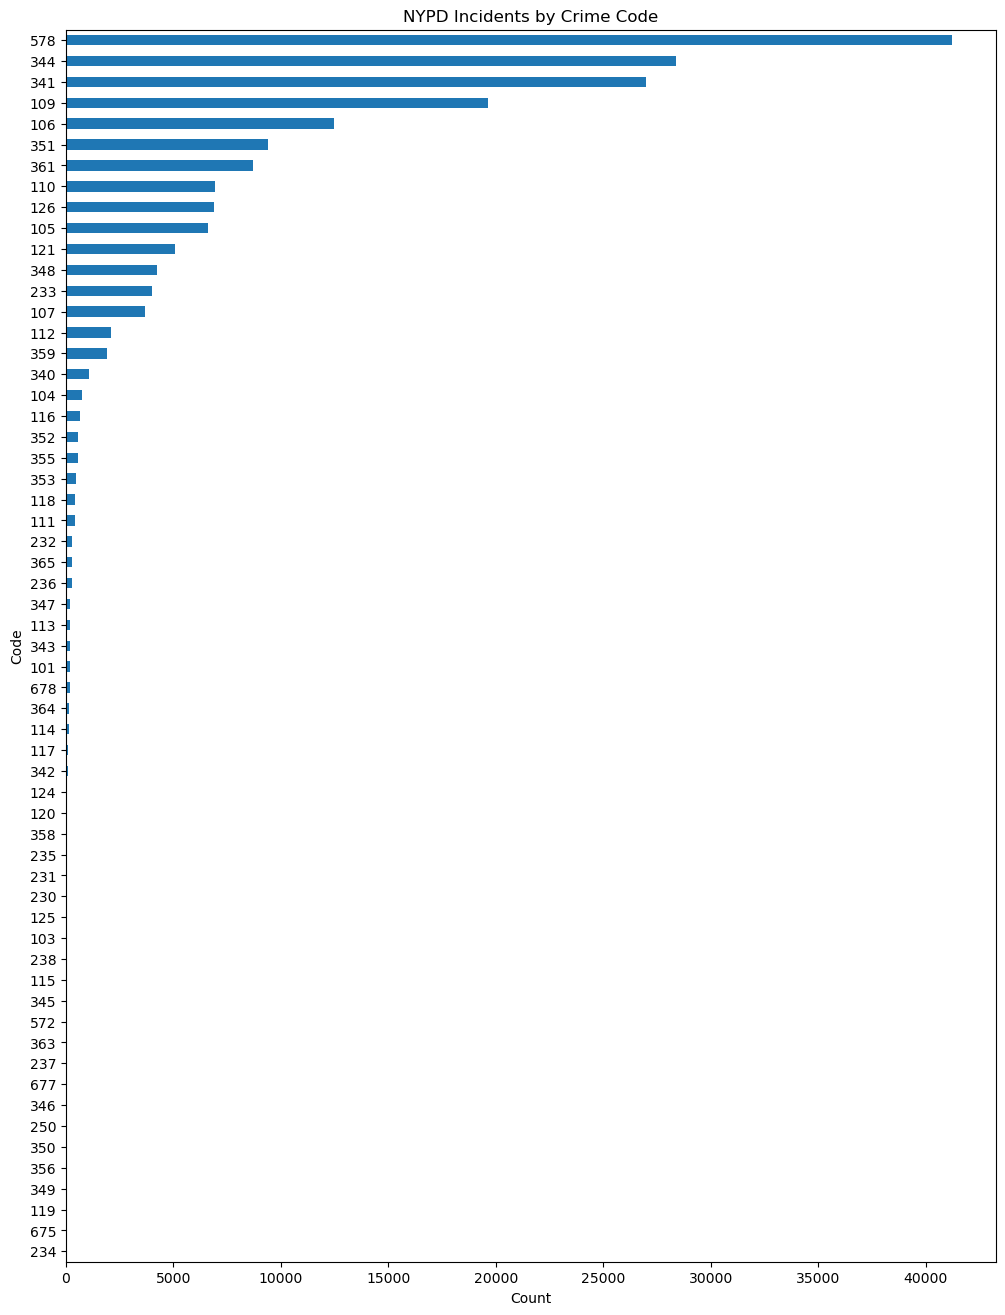

In [27]:
plt.figure(figsize=(12, 16))
grouped_data = NYPD["KY_CD"].groupby(NYPD["KY_CD"]).count()
sorted_data = grouped_data.sort_values(ascending=True)
sorted_data.plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Code")
plt.title("NYPD Incidents by Crime Code")

Text(0.5, 1.0, 'NYPD Incidents by Borough')

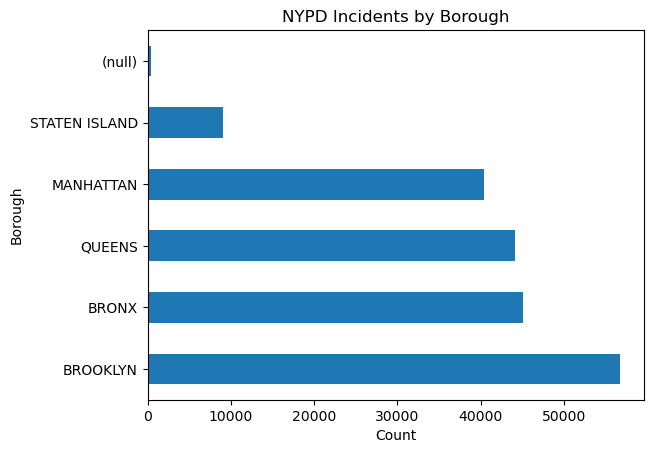

In [ ]:
# New York PD, NY:
grouped_data = NYPD["AREA/BORO"].groupby(NYPD["AREA/BORO"]).count()
sorted_data = grouped_data.sort_values(ascending=False)
sorted_data.plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Borough")
plt.title("NYPD Incidents by Borough")



In [36]:
# Plot for Crime Type Visualization:
plt.figure(figsize=(12, 16))
grouped_data = NYPD["AGE_GROUP"].groupby(NYPD["age_group"]).count()
sorted_data = grouped_data.sort_values(ascending=True)
sorted_data.plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Code")
plt.title("NYPD Incidents by Age Group")

KeyError: 'age_group'

<Figure size 1200x1600 with 0 Axes>